In [ ]:
import keras, keras.backend as K
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Load the Data into Training and Validation Set
(X_train, y_train), (X_val, y_val) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

print("Training samples:", X_train.shape, y_train.shape)
print("Testing samples:", X_val.shape, y_val.shape)

In [ ]:
# Load the trained Model
from keras.models import load_model
cae = load_model('convAutoEncoder.h5')

# Extract 'Encoder' Part from it
encoder = cae.layers[1]

#Get latent representation of all images in training set
encoded_vectors = encoder.predict(X_train)

In [ ]:
from annoy import AnnoyIndex

index = AnnoyIndex(encoded_vectors.shape[1])
for i in range(encoded_vectors.shape[0]):
    index.add_item(i, encoded_vectors[i,:])

#Build the index file, with forest of 20 trees.
index.build(20)
index.save("index.ann")

In [ ]:
def search_image(img_idx):
    #Query top 50 nearest neighbors
    results, distances = index.get_nns_by_item(img_idx, 50, include_distances=True)
    
    #Show given image
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[choice_idx])
    plt.axis('off')
    plt.title('Query Image')
    
    #Show 10 resulting images
    plt.figure(figsize=(20, 2))
    for i in range(10):
        ax = plt.subplot(1, 10, i+1)
        plt.imshow(X_train[results[i]])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title("Dist={:.3f}".format(distances[i]))
    plt.show()

Search results:


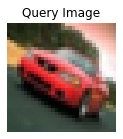

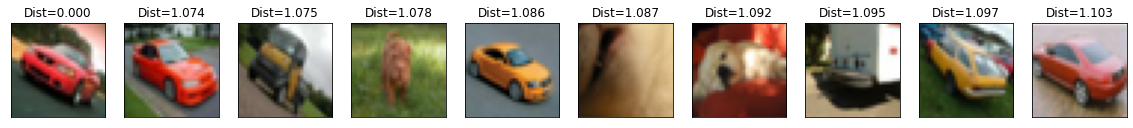

In [96]:
search_image(np.random.randint(0, X_train.shape[0]))